In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# 1 
# read the tsv file
Sig_Eqs = pd.read_csv('earthquakes-2022-10-19_17-21-49_+0800.tsv', sep='\t')
Sig_Eqs.head()

,Search Parameters,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Country,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,SYRIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
4,NaN,-1610.0,NaN,NaN,NaN,NaN,NaN,3.0,1351.0,GREECE,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN


In [3]:
#1.1
Sig_Eqs.groupby(['Country']).sum().sort_values(['Deaths'],ascending=False)['Deaths'][0:20]

Country
CHINA           2075019.0
TURKEY          1134569.0
IRAN            1011446.0
ITALY            498477.0
SYRIA            439224.0
HAITI            323474.0
AZERBAIJAN       317219.0
JAPAN            278142.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135479.0
TURKMENISTAN     117412.0
PERU             102219.0
ISRAEL            90388.0
PORTUGAL          83531.0
GREECE            79174.0
CHILE             64276.0
INDIA             63491.0
TAIWAN            57135.0
Name: Deaths, dtype: float64

<AxesSubplot:xlabel='Year'>

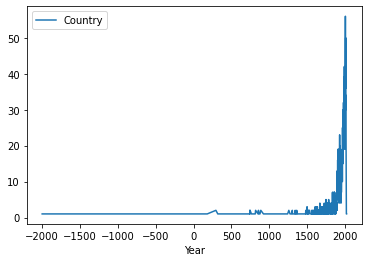

In [4]:
# 1.2
Sig_Eqs.loc[Sig_Eqs['Ms']>3.0].groupby(['Year']).count().loc[:,['Country']].plot()

In [5]:
# 1.3
df = Sig_Eqs.loc[:,['Country','Ms','Location Name','Year','Mo','Dy']]
Country_List = df['Country'].unique()

df['cYear'] = df['Year'].astype(str)
df['cMo'] = df['Mo'].astype(str)
df['cDy'] = df['Dy'].astype(str)
df['cMo'][df['Mo'] < 10] = '0' + df['cMo'].astype(str)
df['cDy'][df['Dy'] < 10] = '0' + df['cDy'].astype(str)
df['DATE'] = df['cYear'] + '/' + df['cMo'] + '/' + df['cDy']
df

re = pd.DataFrame(columns=['Country','Location Name','Ms','DATE'])
re

def CountEq_LargestEq(i):
    df2 = df[df['Country'] == str(i)]
    df3 = df2[df['Ms'] == df2['Ms'].max()][['Country','Location Name','Ms','DATE']]
    df3['Total_Number'] = df[df['Country'] == str(i)]['Country'].count()
    global re
    re = re.append(df3)
for x in Country_List:
    CountEq_LargestEq(x)

re.sort_values('Total_Number',ascending=False,ignore_index=True)

C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/2966024305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cMo'][df['Mo'] < 10] = '0' + df['cMo'].astype(str)
C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/2966024305.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cDy'][df['Dy'] < 10] = '0' + df['cDy'].astype(str)
C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/2966024305.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df['Ms'] == df2['Ms'].max()][['Country','Location Name','Ms','DATE']]


,Country,Location Name,Ms,DATE,Total_Number
0,CHINA,"CHINA: GANSU PROVINCE, SHANXI PROVINCE",8.6,1920.0/12.0/16.0,616.0
1,JAPAN,JAPAN: SANRIKU,8.6,869.0/07.0/13.0,411.0
2,JAPAN,JAPAN: NANKAIDO,8.6,887.0/08.0/26.0,411.0
3,INDONESIA,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,8.8,2004.0/12.0/26.0,405.0
4,IRAN,"IRAN: DAMGHAN, QUMIS",7.9,856.0/12.0/22.0,384.0
...,...,...,...,...,...
147,WALLIS AND FUTUNA (FRENCH TERRITORY),FUTUNA ISLAND,6.4,1993.0/03.0/12.0,1.0
148,SUDAN,SUDAN: KHARTOUM,5.1,1993.0/08.0/01.0,1.0
149,GABON,GABON,6.2,1974.0/09.0/23.0,1.0
150,NORWAY,NORWAY: RANA REGION: LUROY,5.8,1819.0/08.0/31.0,1.0


In [7]:
# 2 
# read csv file
baoan_weather=pd.read_csv('Baoan_Weather_1998_2022.csv')
baoan_weather.head()

D:\LI_YANCHEN\APP_INSTALL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,STATION,DATE,SOURCE,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,AA1,AA2,AA3,AG1,...,REPORT_TYPE.1,SA1,SLP,SOURCE.1,TMP,UA1,UG1,VIS,WG1,WND
0,59493099999,1998-01-01T00:00:00,4,SY-MT,ZGSZ,V020,"06,0000,9,1",NaN,NaN,"0,000",...,SY-MT,NaN,"10184,1",4,"+0186,1",NaN,NaN,"008000,1,N,1",NaN,"040,1,N,0040,1"
1,59493099999,1998-01-01T01:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0220,1",NaN,NaN,"003300,1,N,1",NaN,"130,1,N,0020,1"
2,59493099999,1998-01-01T02:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"003500,1,N,1",NaN,"110,1,N,0020,1"
3,59493099999,1998-01-01T03:00:00,4,SY-MT,ZGSZ,V020,NaN,NaN,NaN,"0,000",...,SY-MT,NaN,"10185,1",4,"+0221,1",NaN,NaN,"011000,1,N,1",NaN,"090,1,N,0020,1"
4,59493099999,1998-01-01T04:00:00,4,FM-15,ZGSZ,V020,NaN,NaN,NaN,"0,999",...,FM-15,NaN,"99999,9",4,"+0240,1",NaN,NaN,"005000,1,N,1",NaN,"270,1,N,0030,1"


C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/4044617321.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  T_data['DATE'],T_data['TIME'] = T_data['DATE'].str.split('T',1).str
C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/4044617321.py:4: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  T_data['TMP'],T_data['CODE'] = T_data['TMP'].str.split(',',1).str


<AxesSubplot:xlabel='DATE,DATE'>

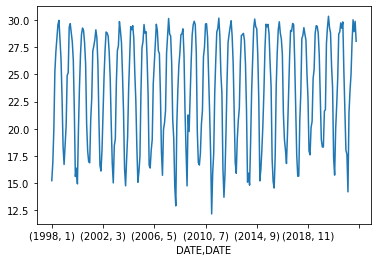

In [8]:
# 2
T_data = baoan_weather.loc[:,('DATE','TMP')]
T_data['DATE'],T_data['TIME'] = T_data['DATE'].str.split('T',1).str
T_data['TMP'],T_data['CODE'] = T_data['TMP'].str.split(',',1).str
T_data['TMP'] = T_data['TMP'].astype(float)/10
T_data['DATE'] = pd.to_datetime(T_data['DATE'])
T_data2 = T_data.loc[T_data['CODE'] == '1'][['DATE','TMP','TIME']]
T_data2
T_data2.groupby([T_data2['DATE'].dt.year,T_data2['DATE'].dt.month])['TMP'].mean().plot()


In [9]:
#3
df = pd.read_csv('ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

D:\LI_YANCHEN\APP_INSTALL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


In [10]:
# 3.1
df.groupby(['SID']).max().sort_values('WMO_WIND', ascending=False)[0:10]['NAME']

C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/2409264014.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df.groupby(['SID']).max().sort_values('WMO_WIND', ascending=False)[0:10]['NAME']


SID
1997125S08079            RHONDA
2005237N14148             TALIM
2005054S09173             PERCY
2005063S12141            INGRID
2005092S11102    ADELINE:JULIET
2005148N06156             NESAT
2005192N11318             EMILY
2005192N22155           HAITANG
2005230N20144             MAWAR
2005236N23285           KATRINA
Name: NAME, dtype: object

In [17]:
# 3.2 ???
plot_df = df.groupby('SID').agg({'WMO_WIND':'max'}).sort_values(by='WMO_WIND',ascending=False)[0:20]
plot_df
#plot_df.plot(kind='bar')

,WMO_WIND
SID,
1997125S08079,95
2005237N14148,95
2005054S09173,95
2005063S12141,95
2005092S11102,95
2005148N06156,95
2005192N11318,95
2005192N22155,95
2005230N20144,95


<AxesSubplot:xlabel='BASIN'>

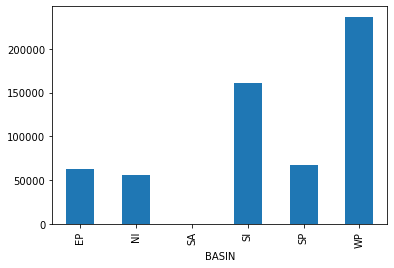

In [18]:
# 3.3
df.groupby('BASIN')['NUMBER'].count().plot(kind='bar')

<AxesSubplot:xlabel='LAT', ylabel='LON'>

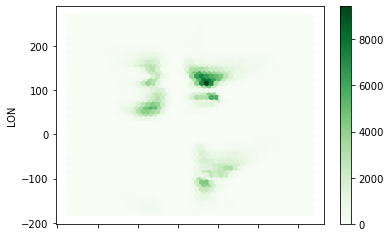

In [19]:
# 3.4
df.plot.hexbin(x='LAT', y='LON', gridsize=50,cmap='Greens')

<AxesSubplot:xlabel='LAT', ylabel='LON'>

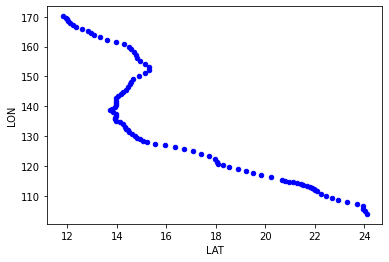

In [20]:
# 3.5
df[(df['SEASON'] == 2018) & (df['NAME'] == 'MANGKHUT')].plot.scatter(x='LAT',y='LON',c='Blue')

In [21]:
# 3.6
df2 = df.loc[(df['SEASON'] >= 1970) & (df['BASIN'].isin(['WP','EP']))]
df2.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,,1006,tokyo,main,1088,1088,_OO___________
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,,,,main,1109,1109,_PP___________
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,,1002,tokyo,main,1143,1143,_OO___________
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,,,,main,1171,1168,_PP___________
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,,998,tokyo,main,1182,1179,_OO___________


<AxesSubplot:xlabel='ISO_TIME'>

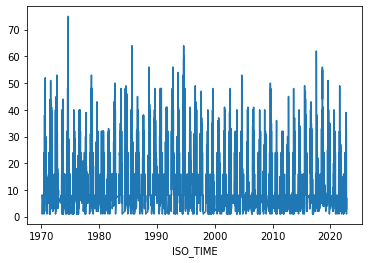

In [22]:
# 3.7
df2.groupby([df2['ISO_TIME'].dt.date]).count()['NUMBER'].plot()

C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/2335276101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DAY_OF_YEAR'] = df2['ISO_TIME'].dt.day_of_year


<AxesSubplot:xlabel='DAY_OF_YEAR'>

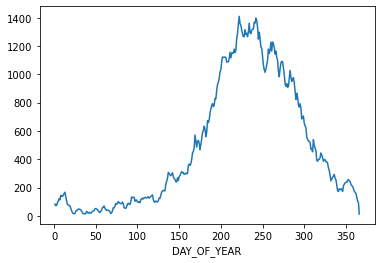

In [37]:
# 3.8
df2['DAY_OF_YEAR'] = df2['ISO_TIME'].dt.day_of_year
df2.groupby(['DAY_OF_YEAR']).size().plot()


C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/3322063674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['DATE'] = df2['ISO_TIME'].dt.date


<AxesSubplot:xlabel='DATE'>

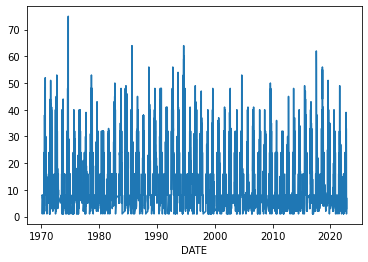

In [28]:
# 3.9
df2['DATE'] = df2['ISO_TIME'].dt.date
df2.groupby(['DATE']).size().plot()


<AxesSubplot:xlabel='ISO_TIME'>

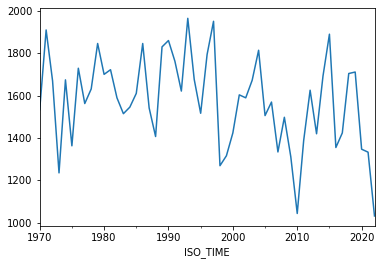

In [40]:
# 3.10
daily_counts = df2.groupby(["ISO_TIME"]).size()
daily_counts.resample('Y').size().plot()

In [42]:
# 4
df = pd.read_csv('USW00094724.csv')
df.head()

,STATION,DATE,AWND,AWND_ATTRIBUTES,CDSD,CDSD_ATTRIBUTES,CLDD,CLDD_ATTRIBUTES,DP01,DP01_ATTRIBUTES,...,TSUN,TSUN_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES
0,USW00094724,1998-01,NaN,NaN,0.0,W,0.0,"3,M",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094724,1998-02,NaN,NaN,0.0,W,0.0,"1,M",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094724,1998-03,NaN,NaN,0.0,W,0.0,",M",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094724,1998-04,4.6,",W",0.0,W,0.0,",W",13.0,",W",...,NaN,NaN,30.0,",W",30.0,",W",17.9,",W",23.7,",W"
4,USW00094724,1998-05,5.0,",W",0.0,W,0.0,"1,W",12.0,",W",...,NaN,NaN,50.0,",W",50.0,",W",16.5,",W",20.6,",W"


C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/2157497495.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  AWND_df['YEAR'],AWND_df['MONTH'] = AWND_df['DATE'].str.split('-',1).str
C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/2157497495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AWND_df['YEAR'],AWND_df['MONTH'] = AWND_df['DATE'].str.split('-',1).str


<AxesSubplot:xlabel='YEAR'>

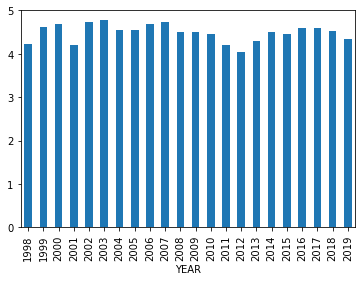

In [43]:
# 4.1+4.2
df1 = df.loc[:,('STATION','DATE','AWND')]
AWND_df = df1.dropna()
AWND_df['YEAR'],AWND_df['MONTH'] = AWND_df['DATE'].str.split('-',1).str
AWND_df.reset_index(drop=True, inplace=True)
AWND_df
AWND_df.groupby('YEAR')['AWND'].mean().plot(kind='bar')

C:\Users\李彦辰\AppData\Local\Temp/ipykernel_26296/3833181037.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df2['YEAR'],df2['MONTH'] = df2['DATE'].str.split('-',1).str


<AxesSubplot:xlabel='YEAR'>

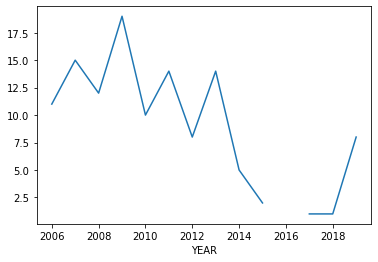

In [44]:
#4.3
df2 = df.loc[:,('STATION','CDSD','CLDD','DATE','DYFG','DYHF','DYTS','EMNT','EMXT')]
df2['YEAR'],df2['MONTH'] = df2['DATE'].str.split('-',1).str
df2
df2.groupby('YEAR')['DYHF'].max().plot()

<AxesSubplot:xlabel='MONTH'>

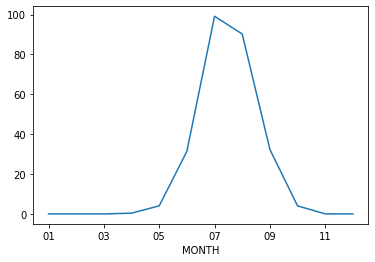

In [47]:
#4.4
df2.sort_values(['CLDD'],ascending=False)[0:10]
df2.groupby('MONTH')['CLDD'].mean().plot()

<AxesSubplot:xlabel='MONTH'>

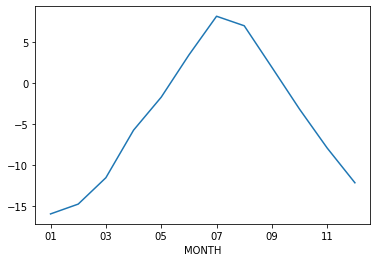

In [48]:
#4.5
df2.sort_values(['EMNT'],ascending=False)[0:10]
df2.groupby('MONTH')['EMNT'].mean().plot()